***说明：本文依据《Sklearn 与 TensorFlow 机器学习实用指南》完成，所有版权和解释权均归作者和翻译成员所有，我只是搬运和做注解。***
第五章是对支持向量机SVM的系统介绍，阐述支持向量机的核心概念，怎么使用这个强大的模型，以及它是如何工作的。  
这应该是第三次做这方面的内容了，贴出另一个比较全面的SVM进阶博客。
https://blog.csdn.net/v_JULY_v/article/details/7624837
支持向量机（SVM）是个非常强大并且有多种功能的机器学习模型，能够做线性或者非线性的分类，回归，甚至异常值检测。机器学习领域中最为流行的模型之一，是任何学习机器学习的人必备的工具。**SVM特别适合应用于复杂但中小规模数据集的分类问题**。  
本章使用数据为Sklearn中iris数据
源代码已经同步在github中  
https://github.com/jwc19890114/-02-learning-file-100days
### 3. SVM回归
SVM 算法应用广泛：不仅仅支持线性和非线性的分类任务，还支持线性和非线性的回归任务。  
读到这里突然忘记回归任务和分类任务的区别了……  
1. 回归问题的应用场景（预测的结果是连续的，例如预测明天的温度25度）。回归问题通常是用来预测一个值。另外，回归分析用在神经网络上，其最上层是不需要加上softmax函数的，而是直接对前一层累加即可。回归是对真实值的一种逼近预测。
2. 分类问题的应用场景（预测的结果是离散的，例如预测明天天气类型-阴，晴，雨）。分类问题是用于将事物打上一个标签，通常结果为离散值。
OK，我们继续。  
SVM算法应用于回归任务，技巧在于“逆转目标”，不是试图找到两类之间的最大margin，而是在限制间隔违规情况下，尽量放置更多的样本在间隔上。间隔宽度由超参数C控制。下面使用SVR来实现SVM回归。（**这就是为什么Sklearn里面svm有一个SVC和SVR，SVC是分类，SVR是回归**）  
~~~python
import numpy as np
from sklearn.svm import LinearSVR
import matplotlib.pyplot as plt
np.random.seed(42)
m=50
X=2*np.random.rand(m,1)
y=(4+3*X+np.random.randn(m,1)).ravel()

#初始化线性支持向量机回归
svm_reg=LinearSVR(epsilon=1.5, random_state=42)
svm_reg.fit(X,y)
~~~
作为对比，生成了两个SVM回归模型，其中一个epsilon=1.5，另一个0.5
~~~python
svm_reg1 = LinearSVR(epsilon=1.5, random_state=42)
svm_reg2 = LinearSVR(epsilon=0.5, random_state=42)
svm_reg1.fit(X, y)
svm_reg2.fit(X, y)

def find_support_vectors(svm_reg,X,y):
    y_pred=svm_reg.predict(X)
    off_margin=(np.abs(y-y_pred)>=svm_reg.epsilon)
    return np.argwhere(off_margin)

svm_reg1.support_=find_support_vectors(svm_reg1,X,y)
svm_reg2.support_=find_support_vectors(svm_reg2,X,y)

eps_x1=1
eps_y_pred=svm_reg1.predict([[eps_x1]])
~~~
~~~python
def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$")
    plt.plot(x1s, y_pred + svm_reg.epsilon, "k--")
    plt.plot(x1s, y_pred - svm_reg.epsilon, "k--")
    plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s=180, facecolors='#FFAAAA')
    plt.plot(X, y, "bo")
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.legend(loc="upper left", fontsize=18)
    plt.axis(axes)

plt.figure(figsize=(9,4))
plt.subplot(121)
plot_svm_regression(svm_reg1,X,y,[0,2,3,11])
plt.title(r"$\epsilon = {}$".format(svm_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
#注意这个声明，用来在图中标注出epsilon。
plt.annotate(
        '', xy=(eps_x1, eps_y_pred), xycoords='data',
        xytext=(eps_x1, eps_y_pred - svm_reg1.epsilon),
        textcoords='data', arrowprops={'arrowstyle': '<->', 'linewidth': 1.5}
    )

plt.text(0.91, 5.6, r"$\epsilon$", fontsize=20)
plt.subplot(122)
plot_svm_regression(svm_reg2, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg2.epsilon), fontsize=18)
plt.show()
~~~
在处理非线性回归任务中，可以使用核化SVM模型。关键参数设定类似上一节的核设定
~~~python
svm_poly_reg=SVR(kernel="poly",degree=2,C=100,epsilon=0.1)
~~~
~~~python
#随机生成数据集，存在一个二次方，使用线性是无法拟合。
np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1) - 1
y = (0.2 + 0.1 * X + 0.5 * X**2 + np.random.randn(m, 1)/10).ravel()
~~~
~~~python
from sklearn.svm import SVR
svm_poly_reg1 = SVR(kernel="poly", degree=2, C=100, epsilon=0.1, gamma="auto")
svm_poly_reg2 = SVR(kernel="poly", degree=2, C=0.01, epsilon=0.1, gamma="auto")
svm_poly_reg1.fit(X, y)
svm_poly_reg2.fit(X, y)

plt.figure(figsize=(9,4))
plt.subplot(121)
plot_svm_regression(svm_poly_reg1,X,y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg1.degree, svm_poly_reg1.C, svm_poly_reg1.epsilon), fontsize=18)
plt.subplot(122)
plot_svm_regression(svm_poly_reg2,X,y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg2.degree, svm_poly_reg2.C, svm_poly_reg2.epsilon), fontsize=18)
plt.show()
~~~


In [7]:
import numpy as np
from sklearn.svm import LinearSVR
import matplotlib.pyplot as plt
np.random.seed(42)
m=50
X=2*np.random.rand(m,1)
y=(4+3*X+np.random.randn(m,1)).ravel()

#初始化线性支持向量机回归
svm_reg=LinearSVR(epsilon=1.5, random_state=42)
svm_reg.fit(X,y)

LinearSVR(C=1.0, dual=True, epsilon=1.5, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=42, tol=0.0001, verbose=0)

In [8]:
svm_reg1 = LinearSVR(epsilon=1.5, random_state=42)
svm_reg2 = LinearSVR(epsilon=0.5, random_state=42)
svm_reg1.fit(X, y)
svm_reg2.fit(X, y)

def find_support_vectors(svm_reg,X,y):
    y_pred=svm_reg.predict(X)
    off_margin=(np.abs(y-y_pred)>=svm_reg.epsilon)
    return np.argwhere(off_margin)

svm_reg1.support_=find_support_vectors(svm_reg1,X,y)
svm_reg2.support_=find_support_vectors(svm_reg2,X,y)

eps_x1=1
eps_y_pred=svm_reg1.predict([[eps_x1]])

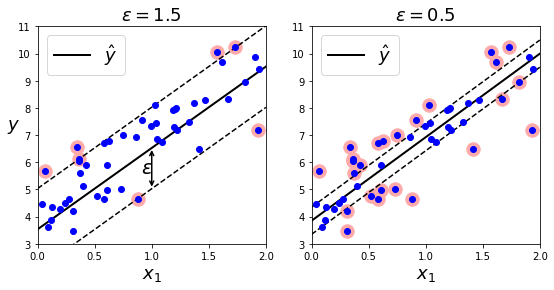

In [13]:
def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$")
    plt.plot(x1s, y_pred + svm_reg.epsilon, "k--")
    plt.plot(x1s, y_pred - svm_reg.epsilon, "k--")
    plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s=180, facecolors='#FFAAAA')
    plt.plot(X, y, "bo")
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.legend(loc="upper left", fontsize=18)
    plt.axis(axes)

plt.figure(figsize=(9,4))
plt.subplot(121)
plot_svm_regression(svm_reg1,X,y,[0,2,3,11])
plt.title(r"$\epsilon = {}$".format(svm_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
#注意这个声明，用来在图中标注出epsilon。
plt.annotate(
        '', xy=(eps_x1, eps_y_pred), xycoords='data',
        xytext=(eps_x1, eps_y_pred - svm_reg1.epsilon),
        textcoords='data', arrowprops={'arrowstyle': '<->', 'linewidth': 1.5}
    )

plt.text(0.91, 5.6, r"$\epsilon$", fontsize=20)
plt.subplot(122)
plot_svm_regression(svm_reg2, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg2.epsilon), fontsize=18)
plt.show()

In [14]:
#随机生成数据集，存在一个二次方，使用线性是无法拟合。
np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1) - 1
y = (0.2 + 0.1 * X + 0.5 * X**2 + np.random.randn(m, 1)/10).ravel()

In [15]:
from sklearn.svm import SVR
svm_poly_reg=SVR(kernel="poly",degree=2,C=100,epsilon=0.1)
svm_poly_reg.fit(X,y)

SVR(C=100, cache_size=200, coef0=0.0, degree=2, epsilon=0.1, gamma='auto',
  kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

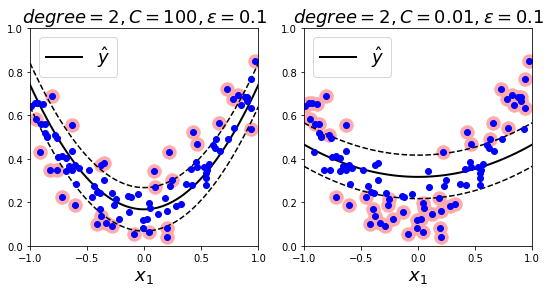

In [22]:
svm_poly_reg1 = SVR(kernel="poly", degree=2, C=100, epsilon=0.1, gamma="auto")
svm_poly_reg2 = SVR(kernel="poly", degree=2, C=0.01, epsilon=0.1, gamma="auto")
svm_poly_reg1.fit(X, y)
svm_poly_reg2.fit(X, y)

plt.figure(figsize=(9,4))
plt.subplot(121)
plot_svm_regression(svm_poly_reg1,X,y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg1.degree, svm_poly_reg1.C, svm_poly_reg1.epsilon), fontsize=18)
plt.subplot(122)
plot_svm_regression(svm_poly_reg2,X,y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg2.degree, svm_poly_reg2.C, svm_poly_reg2.epsilon), fontsize=18)
plt.show()

### 作业处理
1. 在 MNIST 数据集上训练一个 SVM 分类器。因为 SVM 分类器是二元的分类，你需要使用一对多（one-versus-all）来对 10 个数字进行分类。你可能需要使用小的验证集来调整超参数，以加快进程。最后你能达到多少准确度？

In [1]:
#终于把数据读取这块搞定，因为国内网络无法正常访问mldata，导致sklearn.datasets下载MNIST Original时出现连接错误。之前一直使用tensorflow读取数据使用，但是因为我的anaconda的问题，tensorflow一直没法用。
#今天好好查了一下，因为少了一个mnist-original.mat文件，下载后放在mldata文件夹中，在fetch_mldata参数设置中设置本地MNIST_data文件夹即可。
#文件已经更新在了mldata中
from sklearn.datasets import fetch_mldata
from sklearn.svm import LinearSVC
import numpy as np
mnist = fetch_mldata('MNIST original',data_home="./MNIST_data")

X = mnist["data"]
y = mnist["target"]

X_train = X[:60000]
y_train = y[:60000]
X_test = X[60000:]
y_test = y[60000:]
print('train_length:',len(X_train),len(y_train))
print('test_length:',len(X_test),len(y_test))

train_length: 60000 60000
test_length: 10000 10000


In [2]:
#先试一下线性SVM对数据的拟合，使用训练数据对模型进行训练
np.random.seed(42)
rnd_idx=np.random.permutation(60000)
X_train=X_train[rnd_idx]
y_train=y_train[rnd_idx]
# lin_clf=LinearSVC(random_state=42)
# lin_clf.fit(X_train,y_train)

In [60]:
from sklearn.metrics import accuracy_score
y_pred=lin_clf.predict(X_train)
#在第四章训练中已经提到过，目前还不希望使用测试数据集进行评价，模型正确率0.85375
accuracy_score(y_train,y_pred)

0.85375

In [3]:
#正确率达到了85%，看起来不错，但是目前的数据是没有做特征缩放的，所以做一下特征缩放，再用线性SVM拟合试试
#正确率达到92%
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float32))
X_test_scaled = scaler.transform(X_test.astype(np.float32))

In [8]:
#对比线性SVM和
from sklearn.metrics import accuracy_score
lin_clf = LinearSVC(random_state=42)
lin_clf.fit(X_train_scaled, y_train)
y_pred = lin_clf.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

0.9204

In [10]:
#再进一步，使用设定为RBF kernel的SVM进行拟合
#正确率达到94.6%
from sklearn.svm import SVC
svm_clf = SVC(decision_function_shape="ovr", gamma="auto")
svm_clf.fit(X_train_scaled[:10000], y_train[:10000])
y_pred = svm_clf.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

0.94615

In [4]:
#现在采用包含交叉验证的随机搜索调整超参数，因为时间会很长，就用一个小一些的数据集，只使用了1000的样本
#测了一下，提高一个量级，10000样本，时间开销很大，得分0.863，下面为训练后结果
'''
SVC(C=6.335534109540218, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0011263118134606108,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)
'''
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform
from sklearn.svm import SVC
svm_clf = SVC(decision_function_shape="ovr", gamma="auto")
param_distributions = {"gamma": reciprocal(0.001, 0.1), "C": uniform(1, 10)}
rnd_search_cv = RandomizedSearchCV(svm_clf, param_distributions, n_iter=10, verbose=2, cv=3)
rnd_search_cv.fit(X_train_scaled[:1000], y_train[:1000])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] C=3.5988934774124326, gamma=0.001513186272679838 ................
[CV] . C=3.5988934774124326, gamma=0.001513186272679838, total=   0.8s
[CV] C=3.5988934774124326, gamma=0.001513186272679838 ................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


[CV] . C=3.5988934774124326, gamma=0.001513186272679838, total=   0.8s
[CV] C=3.5988934774124326, gamma=0.001513186272679838 ................
[CV] . C=3.5988934774124326, gamma=0.001513186272679838, total=   0.8s
[CV] C=3.055855399572819, gamma=0.06719156480223124 ..................
[CV] ... C=3.055855399572819, gamma=0.06719156480223124, total=   1.0s
[CV] C=3.055855399572819, gamma=0.06719156480223124 ..................
[CV] ... C=3.055855399572819, gamma=0.06719156480223124, total=   1.0s
[CV] C=3.055855399572819, gamma=0.06719156480223124 ..................
[CV] ... C=3.055855399572819, gamma=0.06719156480223124, total=   1.0s
[CV] C=1.107005900704854, gamma=0.001848939794318145 .................
[CV] .. C=1.107005900704854, gamma=0.001848939794318145, total=   0.8s
[CV] C=1.107005900704854, gamma=0.001848939794318145 .................
[CV] .. C=1.107005900704854, gamma=0.001848939794318145, total=   0.8s
[CV] C=1.107005900704854, gamma=0.001848939794318145 .................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   44.6s finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002062190B3C8>, 'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000020623976320>},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [5]:
rnd_search_cv.best_estimator_

SVC(C=6.335534109540218, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0011263118134606108,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [6]:
rnd_search_cv.best_score_

0.863

In [7]:
#获取的超参数再次进行训练，很慢
rnd_search_cv.best_estimator_.fit(X_train_scaled, y_train)

SVC(C=6.335534109540218, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0011263118134606108,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [ ]:
#很慢
y_pred=rnd_search_cv.best_estimator_.predict(X_train_scaled)
accuracy_score(y_train,y_pred)

In [ ]:
#很慢
y_pred = rnd_search_cv.best_estimator_.predict(X_test_scaled)
accuracy_score(y_test, y_pred)